In [23]:
import h5py
import pandas as pd
import numpy as np
#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
    
import statsmodels.api as sm

from scipy.stats import mode

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical


#best milti
#kappa for n_estimators  = 1400: 0.6623353257350921
#accurancy for n_estimators  = 1400: 0.7608943645904631
 
#best binary 
#kappa for n_estimators  = 500: 0.6527900873930736
#accurancy for n_estimators  = 500: 0.9405658224960073

In [24]:
# %load "C:\\Users\\i053131\Desktop\\Epilepsie\\Dreem\\src\\utils\\error.py"

def AnalyzeError(y_true, y_pred):
    fig, ax = plt.subplots(figsize=(20,10))
    plt.subplot(1,2, 1)
    sns.countplot(x=0, data=pd.DataFrame(y_true))
    plt.ylim(0, 4000)
    plt.subplot(1,2, 2)
    sns.countplot(x=0, data=pd.DataFrame(y_pred))
    plt.ylim(0, 4000)
    fig.suptitle("Actual and predicted distribution", size =  'x-large')
    plt.show()
    
    df_ = pd.DataFrame()
    df_["Test"]= y_true
    df_["Pred"] = y_pred
    df_['error'] = df_.Test != df_.Pred
    #sns.countplot(x="Test", data=df_[df_.error])
    
    error0 = df_[(df_.error) & (df_.Test==0)].count()[0] / df_[df_.Test==0].count()[0]
    error1 = df_[(df_.error) & (df_.Test==1)].count()[0] / df_[df_.Test==1].count()[0]
    error2 = df_[(df_.error) & (df_.Test==2)].count()[0] / df_[df_.Test==2].count()[0]
    error3 = df_[(df_.error) & (df_.Test==3)].count()[0] / df_[df_.Test==3].count()[0]
    error4 = df_[(df_.error) & (df_.Test==4)].count()[0] / df_[df_.Test==4].count()[0]

    Lerror = [error0, error1, error2, error3, error4]
    sns.barplot(x=[0, 1, 2, 3, 4], y=Lerror)
    plt.title('Wrongly classified in a phase in percent of the test population for this phase')
    plt.show()

In [25]:
df = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\featuresTrain.xlsx')


In [36]:
df.columns = ['mean_eeg_1', 'std_eeg_1', 'min_eeg_1', 'max_eeg_1', '25_eeg_1',
       '50_eeg_1', '75_eeg_1', 'mean_eeg_2', 'std_eeg_2', 'min_eeg_2',
       'max_eeg_2', '25_eeg_2', '50_eeg_2', '75_eeg_2', 'mean_eeg_3',
       'std_eeg_3', 'min_eeg_3', 'max_eeg_3', '25_eeg_3', '50_eeg_3',
       '75_eeg_3', 'mean_eeg_4', 'std_eeg_4', 'min_eeg_4', 'max_eeg_4',
       '25_eeg_4', '50_eeg_4', '75_eeg_4', 'mean_po_ir', 'std_po_ir',
       'min_po_ir', 'max_po_ir', '25_po_ir', '50_po_ir', '75_po_ir',
       'mean_po_r', 'std_po_r', 'min_po_r', 'max_po_r', '25_po_r', '50_po_r',
       '75_po_r', 'mean_accelerometer_x', 'std_accelerometer_x',
       'min_accelerometer_x', 'max_accelerometer_x', '25_accelerometer_x',
       '50_accelerometer_x', '75_accelerometer_x', 'mean_accelerometer_y',
       'std_accelerometer_y', 'min_accelerometer_y', 'max_accelerometer_y',
       '25_accelerometer_y', '50_accelerometer_y', '75_accelerometer_y',
       'mean_accelerometer_z', 'std_accelerometer_z', 'min_accelerometer_z',
       'max_accelerometer_z', '25_accelerometer_z', '50_accelerometer_z',
       '75_accelerometer_z', 'Y']


In [26]:
training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
X_train = X.values
y = training.iloc[:,-1]
y_train = to_categorical(y.values, num_classes=5)
X_test = test.iloc[:,:-1].values
y_true = test.iloc[:,-1].values
y_test = to_categorical(y_true, num_classes=5)

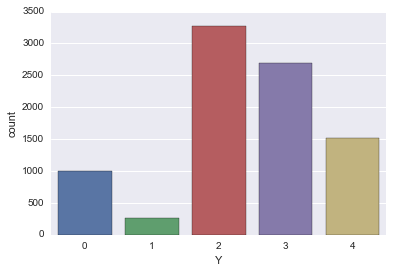

In [27]:
sns.countplot(x="Y", data=test)

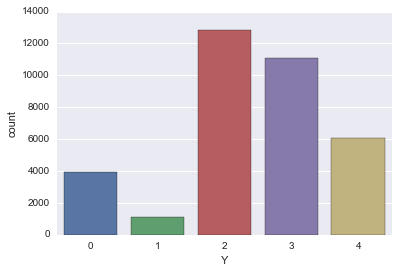

In [28]:
sns.countplot(x="Y", data=training)

In [29]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=63))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=10000)

Epoch 1/50
35064/35064 [==============================] - 1s 15us/step - loss: 12.4212 - acc: 0.2066
Epoch 2/50
35064/35064 [==============================] - 0s 6us/step - loss: 11.3895 - acc: 0.2724
Epoch 3/50
35064/35064 [==============================] - 0s 6us/step - loss: 10.2740 - acc: 0.3463
Epoch 4/50
35064/35064 [==============================] - 0s 6us/step - loss: 10.0849 - acc: 0.3648
Epoch 5/50
35064/35064 [==============================] - 0s 6us/step - loss: 10.1315 - acc: 0.3649
Epoch 6/50
35064/35064 [==============================] - 0s 6us/step - loss: 10.1208 - acc: 0.3653
Epoch 7/50
35064/35064 [==============================] - 0s 6us/step - loss: 10.0946 - acc: 0.3639
Epoch 8/50
35064/35064 [==============================] - 0s 6us/step - loss: 9.9604 - acc: 0.3656
Epoch 9/50
35064/35064 [==============================] - 0s 6us/step - loss: 9.8990 - acc: 0.3626
Epoch 10/50
35064/35064 [==============================] - 0s 6us/step - loss: 9.6335 - acc: 0.3666
E

In [12]:
score = model.evaluate(X_test, y_test, batch_size=128)
y_pred = pd.DataFrame(model.predict_classes(X_test, batch_size=128))

8766/8766 [==============================] - 0s 9us/step


In [14]:
print("accurancy: ", score[1])
print("kappa: ", cohen_kappa_score(y_true, y_pred))

accurancy:  0.3742870180445829
kappa:  0.0


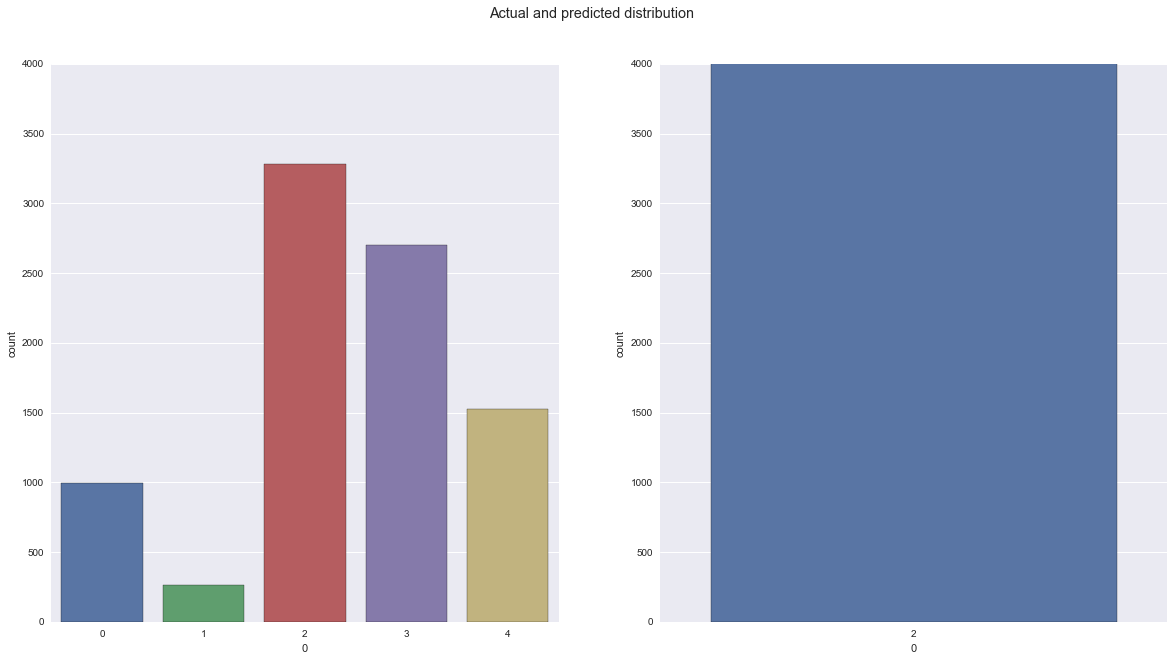

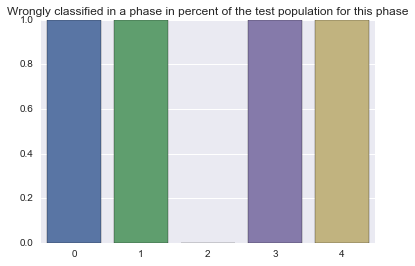

In [17]:
AnalyzeError(y_true, y_pred)

In [22]:
y_pred = list(dnn_clf.predict(X_test))
kappa = cohen_kappa_score(y_true, y_pred)

print("kappa:",  kappa)
print("accurancy f" , accuracy_score(y_true, y_pred))
                          

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\i053131\AppData\Local\Temp\tmp2nn2f0aj\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
kappa: 0.0007775586281241198
accurancy for depth 0.37474332648870634


In [ ]:
AnalyzeError(y_true, y_pred)

In [12]:
dnn_clf.predict(X_test)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\i053131\AppData\Local\Temp\tmp46r6897j\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<generator object DNNClassifier.predict_classes.<locals>.<genexpr> at 0x000002D458BBDDB0>

In [12]:
Lk = []
La = []
rx = list(range(1, 15))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=i, random_state=42, 
                                 min_samples_leaf=5, min_samples_split=64)
    gbc.fit(X, y)
    y_pred = gbc.predict(X_test)
    kappa = cohen_kappa_score(y_true, y_pred)

    print("kappa for depth  = " + str(i) + ":",  kappa)
    print("accurancy for depth  = " + str(i) + ":" , accuracy_score(y_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y_true, y_pred))



kappa for depth  = 1: 0.5679421553050088
accurancy for depth  = 1: 0.6966689482089893
kappa for depth  = 2: 0.6129166683518279
accurancy for depth  = 2: 0.7259867670545289
kappa for depth  = 3: 0.6243403545159225
accurancy for depth  = 3: 0.7331736253707506
kappa for depth  = 4: 0.6080804692650161
accurancy for depth  = 4: 0.7211955281770477
kappa for depth  = 5: 0.6129814685803089
accurancy for depth  = 5: 0.7242756103125713
kappa for depth  = 6: 0.613103270666634
accurancy for depth  = 6: 0.7241615331964408
kappa for depth  = 7: 0.6117866812040376
accurancy for depth  = 7: 0.7230207620351358
kappa for depth  = 8: 0.6012119765930318
accurancy for depth  = 8: 0.715833903718914
kappa for depth  = 9: 0.6003573111561398
accurancy for depth  = 9: 0.7144649783253479
kappa for depth  = 10: 0.6030903929404829
accurancy for depth  = 10: 0.716974674880219
kappa for depth  = 11: 0.6231892663020291
accurancy for depth  = 11: 0.7319187770933151
kappa for depth  = 12: 0.6049096170715111
accurancy f

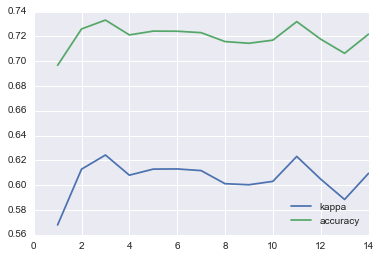

In [13]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

In [14]:
Lk = []
La = []
rx = list(range(100, 1002, 100))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, random_state=42)
    gbc.fit(X, y)
    y_pred = gbc.predict(X_test)
    kappa = cohen_kappa_score(y_true, y_pred)

    print("kappa for n_estimators  = " + str(i) + ":",  kappa)
    print("accurancy for n_estimators  = " + str(i) + ":" , accuracy_score(y_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y_true, y_pred))

kappa for n_estimators  = 100: 0.6059576581119929
accurancy for n_estimators  = 100: 0.7240474560803103
kappa for n_estimators  = 200: 0.6293289905600271
accurancy for n_estimators  = 200: 0.7393337896417979
kappa for n_estimators  = 300: 0.6405080477260987
accurancy for n_estimators  = 300: 0.7468628793064112
kappa for n_estimators  = 400: 0.6514042753272041
accurancy for n_estimators  = 400: 0.7541638147387634
kappa for n_estimators  = 500: 0.655065243491326
accurancy for n_estimators  = 500: 0.7564453570613735
kappa for n_estimators  = 600: 0.6608373293465769
accurancy for n_estimators  = 600: 0.7603239790098106
kappa for n_estimators  = 700: 0.6632069352509192
accurancy for n_estimators  = 700: 0.7620351357517682
kappa for n_estimators  = 800: 0.6692058178454168
accurancy for n_estimators  = 800: 0.7661419119324664
kappa for n_estimators  = 900: 0.6707375932577659
accurancy for n_estimators  = 900: 0.7671686059776409
kappa for n_estimators  = 1000: 0.6731835632269043
accurancy for 

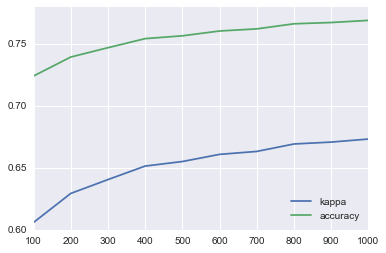

In [15]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

In [16]:
Lk = []
La = []
rx = list(range(100, 2002, 100))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, subsample=0.5, random_state=42)
    gbc.fit(X, y)
    y_pred = gbc.predict(X_test)
    kappa = cohen_kappa_score(y_true, y_pred)

    print("kappa for n_estimators  = " + str(i) + ":",  kappa)
    print("accurancy for n_estimators  = " + str(i) + ":" , accuracy_score(y_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y_true, y_pred))

kappa for n_estimators  = 100: 0.606123631094913
accurancy for n_estimators  = 100: 0.7239333789641798
kappa for n_estimators  = 200: 0.6298737228718084
accurancy for n_estimators  = 200: 0.7397900981063199
kappa for n_estimators  = 300: 0.6438546935383189
accurancy for n_estimators  = 300: 0.7492584987451517
kappa for n_estimators  = 400: 0.6469627037165925
accurancy for n_estimators  = 400: 0.7509696554871093
kappa for n_estimators  = 500: 0.650887140166355
accurancy for n_estimators  = 500: 0.7534793520419804
kappa for n_estimators  = 600: 0.6515502280291572
accurancy for n_estimators  = 600: 0.7538215833903719
kappa for n_estimators  = 700: 0.6558943168692958
accurancy for n_estimators  = 700: 0.7566735112936345
kappa for n_estimators  = 800: 0.6559115537126434
accurancy for n_estimators  = 800: 0.7566735112936345
kappa for n_estimators  = 900: 0.6590189814052587
accurancy for n_estimators  = 900: 0.7587268993839835
kappa for n_estimators  = 1000: 0.6603045270427855
accurancy for n

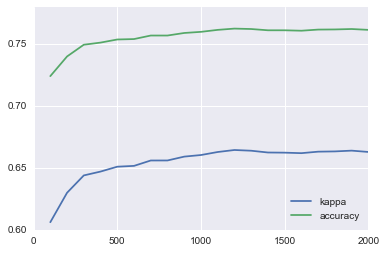

In [17]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

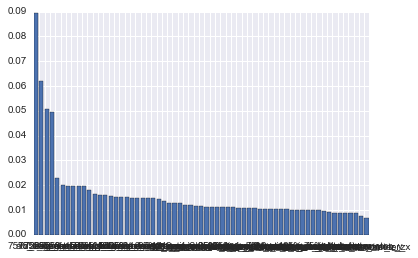

,importance
75%_eeg_3,0.089635
std_eeg_4,0.062134
75%_eeg_1,0.050740
75%_eeg_2,0.049520
25%_eeg_4,0.022978
25%_eeg_2,0.020190
75%_eeg_4,0.019820
25%_eeg_1,0.019811
max_eeg_4,0.019613
std_eeg_3,0.019608


In [19]:
importances = gbc.feature_importances_
feature_importances = pd.DataFrame(importances, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances.index, feature_importances["importance"])
plt.show()

feature_importances.head(10)

In [20]:
df2 = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\binomial_target.xlsx')

In [21]:
training2, test2  = train_test_split(df2, test_size=0.2, random_state=42)
X2 = training2.iloc[:,:-1]
y2 = training2.iloc[:,-1]
X2_test = test2.iloc[:,:-1]
y2_true = test2.iloc[:,-1]

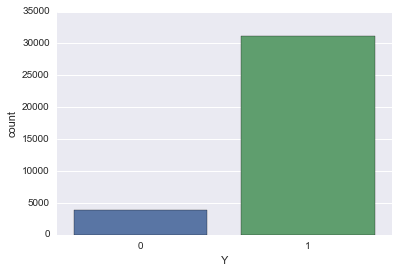

In [23]:
sns.countplot(x="Y", data=training2)

In [26]:
Lk = []
La = []
rx = list(range(1, 15))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.1,subsample=0.5, max_depth=i, random_state=42, 
                                 min_samples_leaf=5, min_samples_split=64)
    gbc.fit(X2, y2)
    y_pred = gbc.predict(X2_test)
    kappa = cohen_kappa_score(y2_true, y_pred)

    print("kappa for depth  = " + str(i) + ":",  kappa)
    print("accurancy for depth  = " + str(i) + ":" , accuracy_score(y2_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y2_true, y_pred))

kappa for depth  = 1: 0.496720817147987
accurancy for depth  = 1: 0.9203741729409081
kappa for depth  = 2: 0.5701900469531074
accurancy for depth  = 2: 0.9283595710700433
kappa for depth  = 3: 0.6168028795604938
accurancy for depth  = 3: 0.93440565822496
kappa for depth  = 4: 0.6215632255487942
accurancy for depth  = 4: 0.9345197353410906
kappa for depth  = 5: 0.6343042737662253
accurancy for depth  = 5: 0.9371435090120922
kappa for depth  = 6: 0.6391803746713307
accurancy for depth  = 6: 0.9375998174766141
kappa for depth  = 7: 0.6340292038820095
accurancy for depth  = 7: 0.9372575861282226
kappa for depth  = 8: 0.6372259220487424
accurancy for depth  = 8: 0.9374857403604837
kappa for depth  = 9: 0.6490396032400779
accurancy for depth  = 9: 0.9401095140314852
kappa for depth  = 10: 0.6535400460330276
accurancy for depth  = 10: 0.9409080538443988
kappa for depth  = 11: 0.6529201317013958
accurancy for depth  = 11: 0.9406798996121378
kappa for depth  = 12: 0.6361922618803327
accurancy f

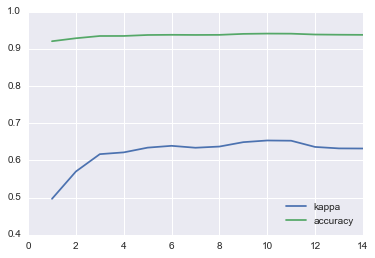

In [27]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

In [24]:
Lk = []
La = []
rx = list(range(100, 2002, 100))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, subsample=0.5, random_state=42)
    gbc.fit(X2, y2)
    y_pred = gbc.predict(X2_test)
    kappa = cohen_kappa_score(y2_true, y_pred)

    print("kappa for n_estimators  = " + str(i) + ":",  kappa)
    print("accurancy for n_estimators  = " + str(i) + ":" , accuracy_score(y2_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y2_true, y_pred))

kappa for n_estimators  = 100: 0.5139254283324319
accurancy for n_estimators  = 100: 0.9239105635409537
kappa for n_estimators  = 200: 0.5367960474299248
accurancy for n_estimators  = 200: 0.9263061829796942
kappa for n_estimators  = 300: 0.5538332010534723
accurancy for n_estimators  = 300: 0.9275610312571299
kappa for n_estimators  = 400: 0.559975172521495
accurancy for n_estimators  = 400: 0.9281314168377823
kappa for n_estimators  = 500: 0.5591168824513815
accurancy for n_estimators  = 500: 0.9274469541409993
kappa for n_estimators  = 600: 0.5638074662777413
accurancy for n_estimators  = 600: 0.9272187999087383
kappa for n_estimators  = 700: 0.5679190579781803
accurancy for n_estimators  = 700: 0.9271047227926078
kappa for n_estimators  = 800: 0.5751051954063533
accurancy for n_estimators  = 800: 0.9280173397216518
kappa for n_estimators  = 900: 0.5777845917952719
accurancy for n_estimators  = 900: 0.9283595710700433
kappa for n_estimators  = 1000: 0.5879045442069575
accurancy for 

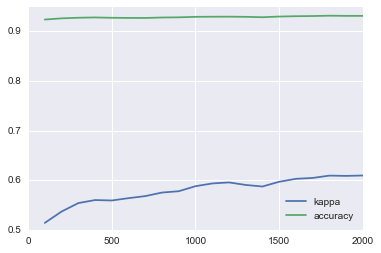

In [25]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

In [28]:
Lk = []
La = []
rx = list(range(100, 2002, 100))
for i in rx:
    gbc = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1,subsample=0.5, max_depth=11, random_state=42, 
                                 min_samples_leaf=5, min_samples_split=64)
    gbc.fit(X2, y2)
    y_pred = gbc.predict(X2_test)
    kappa = cohen_kappa_score(y2_true, y_pred)

    print("kappa for n_estimators  = " + str(i) + ":",  kappa)
    print("accurancy for n_estimators  = " + str(i) + ":" , accuracy_score(y2_true, y_pred))
    Lk.append(kappa)
    La.append(accuracy_score(y2_true, y_pred))

kappa for n_estimators  = 100: 0.6194682785925539
accurancy for n_estimators  = 100: 0.9354323522701347
kappa for n_estimators  = 200: 0.6233827807222133
accurancy for n_estimators  = 200: 0.9354323522701347
kappa for n_estimators  = 300: 0.6435959982077368
accurancy for n_estimators  = 300: 0.9387405886379192
kappa for n_estimators  = 400: 0.6445586854353347
accurancy for n_estimators  = 400: 0.9389687428701803
kappa for n_estimators  = 500: 0.6527900873930736
accurancy for n_estimators  = 500: 0.9405658224960073
kappa for n_estimators  = 600: 0.6425834902674818
accurancy for n_estimators  = 600: 0.9391968971024413
kappa for n_estimators  = 700: 0.650992204289284
accurancy for n_estimators  = 700: 0.9405658224960073
kappa for n_estimators  = 800: 0.650992204289284
accurancy for n_estimators  = 800: 0.9405658224960073
kappa for n_estimators  = 900: 0.6524319941626113
accurancy for n_estimators  = 900: 0.9405658224960073
kappa for n_estimators  = 1000: 0.6520731615342013
accurancy for n

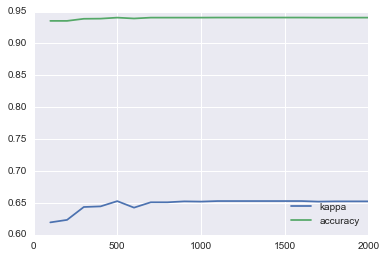

In [29]:
plt.plot(rx, Lk, label = "kappa")
plt.plot(rx, La, label = "accuracy")
plt.legend(loc='lower right')

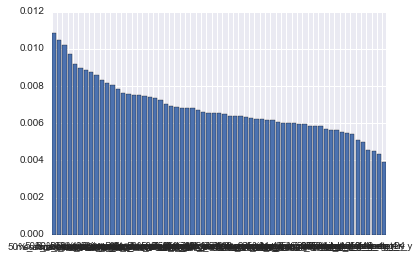

,importance
50%_eeg_1,0.010874
50%_accelerometer_z,0.010497
50%_eeg_2,0.010214
mean_accelerometer_x,0.009730
50%_po_ir,0.009190
50%_po_r,0.008983
min_accelerometer_x,0.008857
max_accelerometer_x,0.008776
min_eeg_2,0.008571
25%_po_ir,0.008315


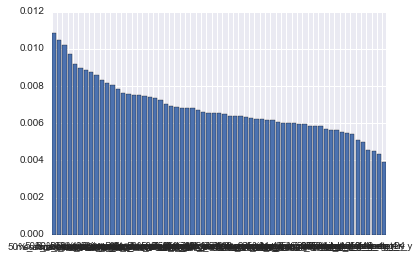

In [30]:
importances2 = gbc.feature_importances_
feature_importances2 = pd.DataFrame(importances2, index = X2.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.bar(feature_importances2.index, feature_importances2["importance"])
plt.show()

plt.bar(feature_importances2.index, feature_importances2["importance"])

feature_importances2.head(10)


<BarContainer object of 63 artists>

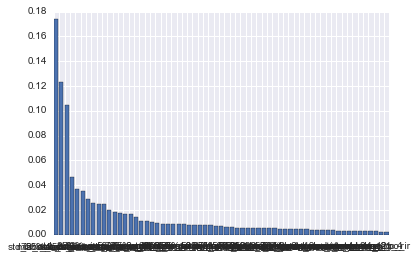

In [57]:
feature_importances2.index
plt.bar(feature_importances2.index, feature_importances2["importance"])